In [1]:
from types import SimpleNamespace
from scipy import constants
import holoviews as hv
import numpy as np
from matplotlib import pyplot as plt

hv.notebook_extension()
#hv.extension('bokeh')

In [2]:
def transmission_amplitude(p, omega, z=1):
    omega_z = np.sqrt(p.eps ** 2 + np.abs(p.t0 + z * p.t1) ** 2)
    g_z = -p.lamb * np.abs(p.t0 + z * p.t1) / (2 * omega_z)
    chi_z = (g_z ** 2) / (1j * p.Gamma_tot - (2 * omega_z - omega))
    return -1j*np.sqrt(p.kappa_in * p.kappa_out) / ((-1j / 2) * (p.kappa_in + p.kappa_out) + 
                                                    (p.omega_0 - omega) + chi_z)


def holoviews_transmission(p, omega):
    return hv.Curve((omega, np.abs(transmission_amplitude(params, omega, z=1))**2), kdims=['omega']) * \
           hv.Curve((omega, np.abs(transmission_amplitude(params, omega, z=-1))**2), kdims=['omega'])
    

def holoviews_phase_shift(p, omega):
    return hv.Curve((omega / (2 * np.pi), -(360 / (2 * np.pi)) * np.angle(transmission_amplitude(params, omega, z=1))), kdims=['frequency'], vdims=['Phase shift (deg)']) * \
           hv.Curve((omega / (2 * np.pi), -(360 / (2 * np.pi)) * np.angle(transmission_amplitude(params, omega, z=-1))), kdims=['frequency'], vdims=['Phase shift (deg)'])
    

def maximum_phase_shift(p, omega):
    diff = np.angle(transmission_amplitude(params, omega, z=1)) - np.angle(transmission_amplitude(params, omega, z=-1))
    max_diff = np.max(np.abs(diff))
    omega_max_diff = [omega[i] for i in range(len(omega)) if np.abs(diff[i]) == max_diff]
    return 360 * max_diff / (2 * np.pi), omega_max_diff

:Overlay
   .Curve.I  :Curve   [frequency]   (Phase shift (deg))
   .Curve.II :Curve   [frequency]   (Phase shift (deg))
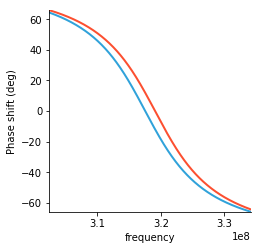

In [3]:
# Values from the Plugge paper
kappa_in = 40e6 #* (2 * np.pi)
kappa_out = 40e6 #* (2 * np.pi)
omega_0 = 2000e6 #* (2 * np.pi)
eps = 0;
t0 = 1000e6 #* (2 * np.pi)
t1 = 400e6 #* (2 * np.pi)
lamb = 200e6 #* (2 * np.pi)
Gamma_tot = 1e9 #* (2 * np.pi)
omega = np.linspace(0.95 * omega_0, 1.05 * omega_0, 1000)

params = SimpleNamespace(kappa_in=kappa_in, kappa_out=kappa_out, omega_0=omega_0, Gamma_tot=Gamma_tot,
                        lamb=lamb, t0=t0, t1=t1, eps=eps)

# holoviews_transmission(params, omega)
holoviews_phase_shift(params, omega)

247338796.385
Maximum phase shift is 8.01 deg.
Maximum occurs at omega = 5032.33e6 s-1
This corresponds to a frequency of 800.92 MHz


:Overlay
   .Curve.I  :Curve   [frequency]   (Phase shift (deg))
   .Curve.II :Curve   [frequency]   (Phase shift (deg))
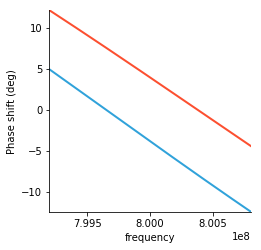

In [16]:
# Values from estimates for lumped elements
kappa_in = 5e6 * (2 * np.pi)
kappa_out = 5e6 * (2 * np.pi)
omega_0 = 800e6 * (2 * np.pi)
eps = 0#300e6 * (2 * np.pi);
t0 = 500e6 * (2 * np.pi)
t1 = 300e6 * (2 * np.pi)
Gamma_tot = 0.5e9 * (2 * np.pi)

C_QD_res = 2e-15
beta = C_QD_res / 0.2e-12              # Use total capacitance of 200 fF to calculate lever arm

lamb = ( beta * constants.e / constants.hbar) * np.sqrt(constants.hbar * omega_0 / C_QD_res)
print(lamb)
omega = np.linspace(0.975 * omega_0, 1.025 * omega_0, 100000)
omega_near_resonance = np.linspace(0.999 * omega_0, 1.001 * omega_0, 10000)
params = SimpleNamespace(kappa_in=kappa_in, kappa_out=kappa_out, omega_0=omega_0, Gamma_tot=Gamma_tot,
                        lamb=lamb, t0=t0, t1=t1, eps=eps)

print('Maximum phase shift is {:.2f} deg.\nMaximum occurs at omega = {:.2f}e6 s-1\nThis corresponds to a frequency of {:.2f} MHz'.format(maximum_phase_shift(params, omega)[0], maximum_phase_shift(params, omega)[1][0]/1e6, maximum_phase_shift(params, omega)[1][0]/(2*np.pi * 1e6)))
holoviews_phase_shift(params, omega_near_resonance)
# holoviews_phase_shift(params, omega)

Coupling is 176 MHz
Maximum phase shift is 92.73 deg.
Maximum occurs at omega = 31415.54e6 s-1
This corresponds to a frequency of 4999.94 MHz


:Overlay
   .Curve.I  :Curve   [frequency]   (Phase shift (deg))
   .Curve.II :Curve   [frequency]   (Phase shift (deg))
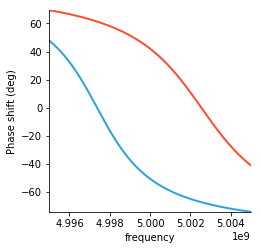

In [5]:
# Values from estimates for cQED
kappa_in = 1e6 * (2 * np.pi)
kappa_out = 1e6 * (2 * np.pi)
omega_0 = 5e9 * (2 * np.pi)
eps = 1e9 * (2 * np.pi);
t0 = 2.5e9 * (2 * np.pi)
t1 = 1e9 * (2 * np.pi)
Gamma_tot = 1e9 * (2 * np.pi)

C_QD_res = 1.6e-15
beta = C_QD_res / 100e-15              # Use total capacitance of 200 fF to calculate lever arm

lamb = ( beta * constants.e / constants.hbar) * np.sqrt(constants.hbar * omega_0 / C_QD_res)

print("Coupling is " + str(int(lamb / (2*np.pi*1e6))) + " MHz")

omega = np.linspace(0.975 * omega_0, 1.025 * omega_0, 100000)
omega_near_resonance = np.linspace(0.999 * omega_0, 1.001 * omega_0, 10000)
params = SimpleNamespace(kappa_in=kappa_in, kappa_out=kappa_out, omega_0=omega_0, Gamma_tot=Gamma_tot,
                        lamb=lamb, t0=t0, t1=t1, eps=eps)

print('Maximum phase shift is {:.2f} deg.\nMaximum occurs at omega = {:.2f}e6 s-1\nThis corresponds to a frequency of {:.2f} MHz'.format(maximum_phase_shift(params, omega)[0], maximum_phase_shift(params, omega)[1][0]/1e6, maximum_phase_shift(params, omega)[1][0]/(2*np.pi * 1e6)))
holoviews_phase_shift(params, omega)

holoviews_phase_shift(params, omega_near_resonance)
# holoviews_phase_shift(params, omega)

## Playing with numbers

Gate capacitance = 6.41742481059527e-16F
Coupling is 45 MHz
Maximum phase shift is 9.35 deg.
Maximum occurs at omega = 6241.99e6 s-1
This corresponds to a frequency of 993.44 MHz


:Overlay
   .Curve.I  :Curve   [frequency]   (Phase shift (deg))
   .Curve.II :Curve   [frequency]   (Phase shift (deg))
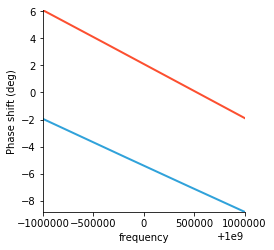

In [38]:
Q = 70
omega_0 = 1000e6*2*np.pi #* (2 * np.pi) - e.g. resonance frequency
eps = 0; #Dot-dot detuning (island-dot detuning assumed to be _______)
t0 = 1800e6 #* (2 * np.pi)
t1 = 1700e6 #* (2 * np.pi)
Ec_dot = 200e-6*1.6e-19 #[J] Dot charging energy
beta = 0.8 #dot lever arm (Cg/C_dot)
Cp = 0.3e-12 #Resonator stray capacitance


C_dot = constants.e**2/Ec_dot
Cg = C_dot*beta
print('Gate capacitance = '+str(Cg)+'F')

Gamma_tot = 1e9 #* (2 * np.pi) #Decay and dephasing of DQD
omega = np.linspace(0.95 * omega_0, 1.05 * omega_0, 1000)

kappa_in = omega_0/Q
kappa_out = omega_0/Q

lamb = ( beta * constants.e / constants.h) * np.sqrt(constants.hbar * omega_0 / Cp) 

print("Coupling is " + str(int(lamb / (2*np.pi*1e6))) + " MHz")

params = SimpleNamespace(kappa_in=kappa_in, kappa_out=kappa_out, omega_0=omega_0, Gamma_tot=Gamma_tot,
                        lamb=lamb, t0=t0, t1=t1, eps=eps)
omega_near_resonance = np.linspace(0.999 * omega_0, 1.001 * omega_0, 10000)
print('Maximum phase shift is {:.2f} deg.\nMaximum occurs at omega = {:.2f}e6 s-1\nThis corresponds to a frequency of {:.2f} MHz'.format(maximum_phase_shift(params, omega)[0], maximum_phase_shift(params, omega)[1][0]/1e6, maximum_phase_shift(params, omega)[1][0]/(2*np.pi * 1e6)))
#holoviews_transmission(params, omega)
holoviews_phase_shift(params, omega_near_resonance)

#L = 1/(4*np.pi**2*Cp*(omega_0/(2*np.pi))**2)
#print('Required L = ' + str(L/1e-9) + ' nH')

In [8]:
1/(4*np.pi**2*1.2e9*0.07e-12)

301.55114179267196

In [96]:
cap_tmp = (2 * np.pi * 8.85e-12 * 3.9 * 7e-6)/(np.arccosh((2 * 285 + 90)/90))
print(cap_tmp)
print(1e6 * 1.6e-19 / cap_tmp)

5.66246912495e-16
282.562247086


In [79]:
100e-9*np.sqrt((3*np.sqrt(3)/(2 * np.pi)))

9.0939174349269748e-08

In [4]:
Ec_dot = 200e-6*1.6e-19 #[J] Dot charging energy
beta = 0.8 #dot lever arm (Cg/C_dot)
omega_0 = 500e6 #resonance frequency
C_dot = constants.e**2/Ec_dot
#Cg = C_dot*beta
Cg = 650e-18
Cp = 200e-15

lamb = ( beta * constants.e / constants.h) * np.sqrt(constants.hbar * omega_0 / Cp)
print(lamb/1e6)
print(C_dot)

99.32359633
8.021781013244086e-16


In [4]:
t = 5e9*constants.h #[J]
alpha = 100e-18*4*t/(constants.e**2)
print(alpha)

0.05162561491223283


## Colless analysis

In [5]:
def Cquantum(t, alpha):
    C = (constants.e**2/(2*t))*alpha**2
    return C

def delta_phase(alpha, Cq, Q, Cp):
    phi = (alpha*Cq*Q/Cp)*360/(2*np.pi)
    return phi

In [7]:
from scipy import constants
import numpy as np

Z_0 = 50 #[Ohms] line impedance
alpha = 1 #phase shift constant
beta = 0.05 #lever arm of gate connected to resonator
Cp = 0.23e-12 #[F] Resonator stray capacitance
L = 210e-9 #[H] tank circuit inductance
t = 8e9*constants.h #[J] double dot intra-dot tunnel coupling
Q = 70

f_res = 1/(2*np.pi*np.sqrt(L*Cp))
#Q = np.sqrt(L/Cp)/Z_0
BW = f_res/Q

Cq = (constants.e**2/(2*t))*beta**2 #quantum capacitance at interdot transition
delta_phi = alpha*Cq*Q/Cp #[rad] resonator phase shift

print('Resonance frequency = '+str(f_res/1e6)+'MHz')
#print('Expected Q = '+str(Q))
print('Bandwidth = '+str(BW/1e6)+'MHz')
print('quantum capacitance = '+str(Cq)+'F')
print('phase shift = '+str(delta_phi*360/(2*np.pi))+' deg')

Resonance frequency = 724.180066237MHz
Bandwidth = 10.3454295177MHz
quantum capacitance = 6.053196664703597e-18F
phase shift = 0.10555471087614256 deg


In [8]:
t = 8e9*(constants.h)
Q = 70

alpha = np.linspace(0,1,1000)
Cp = np.linspace(5e-14, 5e-13,2000)

delta_phi = np.array([[0]*len(Cp)]*len(alpha))

for i in range(len(alpha)):
    for j in range(len(Cp)):
        Cq = Cquantum(t, alpha[i])
        delta_phi[i,j] = delta_phase(alpha[i], Cq, Q, Cp[j])
                                          

plt.pcolormesh(alpha, Cp/1e-12, np.transpose(delta_phi))
plt.xlabel('alpha')
plt.ylabel('Cp (pF)')
plt.colorbar()
plt.title('Phase shift (deg)')
plt.show()



NameError: name 'plt' is not defined

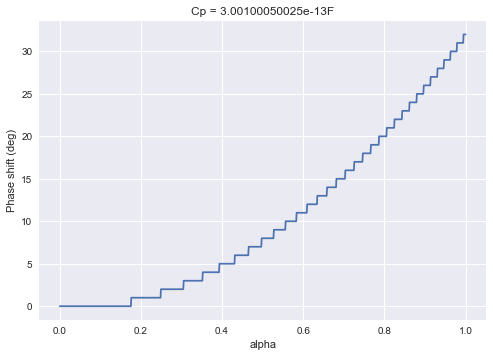

In [54]:
Cp_cut = 0.3e-12
idx = np.argmin(np.abs(Cp - Cp_cut))
plt.plot(alpha, delta_phi[:,idx])
plt.xlabel('alpha')
plt.ylabel('Phase shift (deg)')
plt.title('Cp = '+str(Cp[idx])+'F')
plt.show()

## Duty analysis

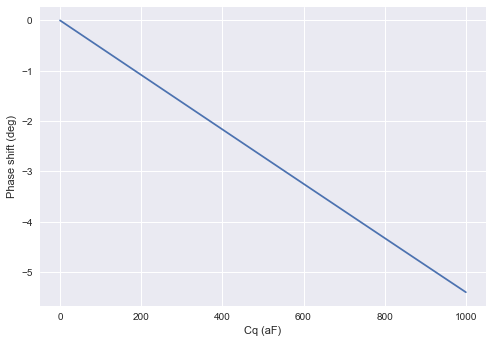

In [69]:
Q = 21
L = 490e-9
Cq = np.linspace(0, 1000, 100)*1e-18
C = L/(Q*50)**2

theta = 360*np.arctan(-2*Q*Cq/C)/(2*np.pi)

plt.plot(Cq/1e-18, theta)
plt.xlabel('Cq (aF)')
plt.ylabel('Phase shift (deg)')
plt.show()

In [64]:
np.arctan(np.pi/4)

0.66577375002835382

In [2]:
A = 150*150*1e-12
epsilon = 8.85e-12
k = 4
t = 285e-9
C = A*epsilon*k/t
print(C/1e-12)

2.794736842105263


## Lambert numbers with Colless formulas

In [25]:
Z_0 = 50 #[Ohms] line impedance
alpha = 1 #phase shift constant
beta = 27/727 #lever arm of gate connected to resonator
Cp = 0.33e-12 #[F] Resonator stray capacitance
L = 560e-9 #[H] tank circuit inductance
t = 48e-6*1.6e-19 #[J] double dot intra-dot tunnel coupling
Q = 10
f_res = 370e6

#f_res = 1/(2*np.pi*np.sqrt(L*Cp))
#Q = np.sqrt(L/Cp)/Z_0
BW = f_res/Q

Cq = (constants.e**2/(2*t))*beta #quantum capacitance at interdot transition
delta_phi = alpha*Cq*Q/Cp #[rad] resonator phase shift

print('Resonance frequency = '+str(f_res/1e6)+'MHz')
#print('Expected Q = '+str(Q))
print('Bandwidth = '+str(BW/1e6)+'MHz')
print('quantum capacitance = '+str(Cq)+'F')
print('phase shift = '+str(delta_phi*360/(2*np.pi))+' deg')

Resonance frequency = 370.0MHz
Bandwidth = 37.0MHz
quantum capacitance = 6.20667375508913e-17F
phase shift = 0.10776248817612774 deg


In [20]:
1/(4*np.pi**2*349e6**2*470e-9)

4.4247786650573286e-13

## Gonzalez-Zalba analysis

In [29]:
Ec = 7.5e-3*1.6e-19 #[J] Charging energy e^2/2C. Gonzalez-Zalba number: 7.5mV
ng0 = 0.49999999999 #[e] average gate charge - a.k.a. working point
dng = 0.03 #[e] amplitude of AC wiggle on gate. Gonzalez-Zalba number: 0.03
f = 335e6 #[Hz] frequency of AC wiggle. Gonzalez-Zalba number: 335MHz
#Rt = 100e3 #[Ohms] tunnel resistance
Gamma_0 = 1e9 #[Hz] Constant tunnel rate away from degeneracy. Gonzalez-Zalba number: 1GHz
T = 0.1 #[K] temperature. Gonzalez-Zalba number: 100mK
#Cg = 10e-18 #[F] gate capacitance.
alpha = 0.92 #Gate lever arm. Gonzalez-Zalba number: 0.92
Q = 42 #Loaded Q factor
Cp = 0.5e-12 #[F] Resonator stray capacitance

omega = 2*np.pi*f
t=1
ngt = ng0 + dng*np.sin(omega*t)
Delta_E0 = Ec*(1 - 2*ng0)
Rk = constants.h/constants.e**2
C_sigma = constants.e**2/(2*Ec)
Rt = 2*constants.k*T/(constants.e**2*Gamma_0)
Cg = C_sigma*alpha

gamma = (Delta_E0/constants.h)*(Rk/Rt)/np.tanh(Delta_E0/(2*constants.k*T))

R_Sis = 2*Rt*(C_sigma/Cg)**2*(constants.k*T/Delta_E0)*np.sinh(Delta_E0/(constants.k*T))*(1 + gamma**2/omega**2)
print('R_Sis = ' + str(R_Sis) + ' Ohms')
print('Tunnel resistance = ' + str(Rt) + ' Ohms')


R_Sis = 311554.758952 Ohms
Tunnel resistance = 107570.29188098377 Ohms


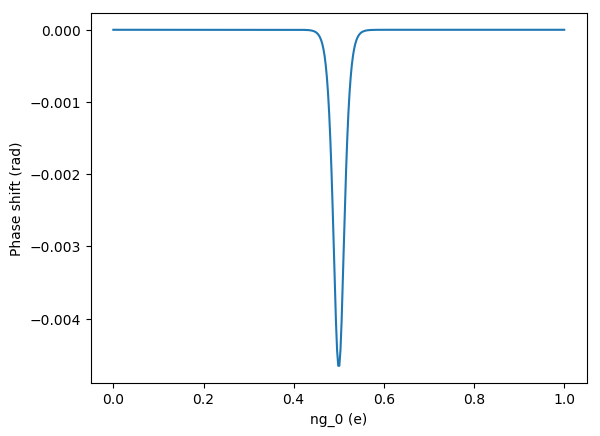

In [41]:
T = 1.4
Gamma_0 = 380e6
dng = 0.0125


ng0 = np.linspace(0, 1, 400)
Delta_E0 = Ec*(1 - 2*ng0)
Delta_phi = (-np.pi*Q/Cp) * ((constants.e*alpha)**2/(2*constants.k*T)) * (1/np.cosh(Delta_E0/(2*constants.k*T)))**2 * (1/(1+omega**2/Gamma_0**2))

plt.plot(ng0, Delta_phi)
plt.xlabel('ng_0 (e)')
plt.ylabel('Phase shift (rad)')
plt.show()